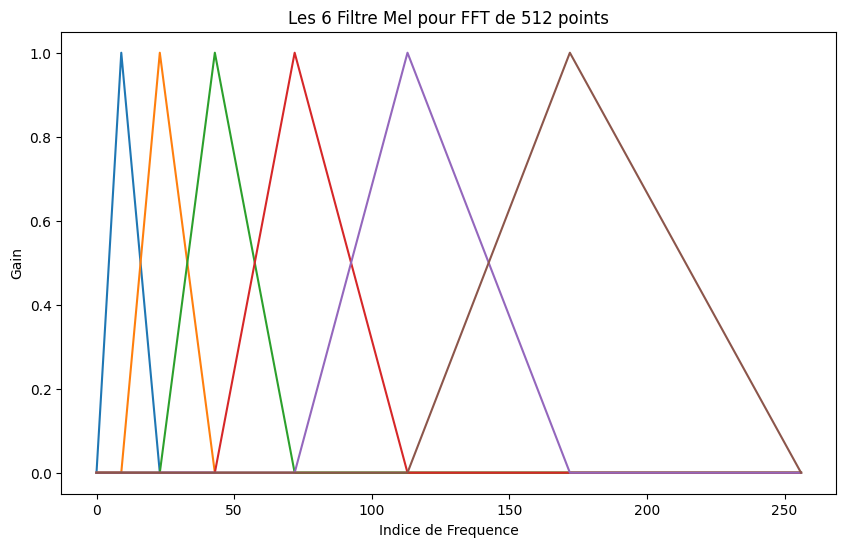

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_mel_filter_bank(fs, Nfft, Nfilt):
    # Máxima frequência usada
    maxf = fs / 2
    
    # Frequência máxima em escala Mel
    maxmelf = 2595 * np.log10(1 + maxf / 700)
    
    # Frequências em escala Mel igualmente espaçadas
    edgemelfs = np.linspace(0, maxmelf, Nfilt + 2)
    
    # Conversão das frequências Mel para a escala linear
    edgefrqs = 700 * (10**(edgemelfs / 2595) - 1)
    
    # Converter para os índices da FFT
    bin_freqs = np.floor((Nfft + 1) * edgefrqs / fs).astype(int)
    
    # Inicializar o banco de filtros
    MelFBank = np.zeros((Nfilt, Nfft // 2 + 1))
    
    # Construir cada filtro triangular
    for i in range(1, Nfilt + 1):
        start, center, end = bin_freqs[i - 1], bin_freqs[i], bin_freqs[i + 1]
        
        # Rampa ascendente
        MelFBank[i - 1, start:center] = (np.arange(start, center) - start) / (center - start)
        
        # Rampa descendente
        MelFBank[i - 1, center:end] = (end - np.arange(center, end)) / (end - center)
    
    return MelFBank

# Parâmetros de exemplo
fs = 16000       # Taxa de amostragem
Nfft = 512      # Pontos na FFT
Nfilt = 6        # Número de filtros Mel

# Criar o banco de filtros
mel_filters = create_mel_filter_bank(fs, Nfft, Nfilt)

# Visualizar os filtros Mel
plt.figure(figsize=(10, 6))
for i in range(Nfilt):
    plt.plot(mel_filters[i])
plt.title("Les 6 Filtre Mel pour FFT de 512 points")
plt.xlabel("Indice de Frequence")
plt.ylabel("Gain")
plt.show()


In [10]:
import json
filters_list = mel_filters.tolist()

# Exportar para um arquivo JSON
with open('mel_filters.json', 'w') as f:
    json.dump(filters_list, f)